In [227]:

#This is the last file that I have worked on.
# 
#  It produces two subsets : categorical data and numerical data
#The end goal is to eventually clean all of the data from the categorical file and place the newly cleaned attributes into numerical
#With that end case, the categorical dataset will be empty

#Note - we need to learn how to parse the dictionaries:
# ie attributes shear_modulus, bulk_modulus' and 'structure; are the big ones. 
# This step has been a big roadblock for me (I am new to python)


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sci
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report

In [228]:
df = pd.read_csv('../ignore/real_molecules.csv')


/var/folders/xk/fhgbj8qj60n54b05mpfnck0w0000gn/T/ipykernel_67424/823267499.py:1: DtypeWarning: Columns (23,40,41,54) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../ignore/real_molecules.csv')


In [229]:
theoretical = (df['theoretical'] == 1).sum()

print(theoretical)

df.drop(['theoretical', 'deprecated'], axis=1, inplace=True)


0


In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49772 entries, 0 to 49771
Data columns (total 56 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   formula_pretty                                49771 non-null  object 
 1   nsites                                        49772 non-null  int64  
 2   elements                                      49772 non-null  object 
 3   nelements                                     49772 non-null  int64  
 4   composition                                   49772 non-null  object 
 5   composition_reduced                           49772 non-null  object 
 6   formula_anonymous                             49772 non-null  object 
 7   chemsys                                       49772 non-null  object 
 8   volume                                        49772 non-null  float64
 9   density                                       49772 non-null 

In [231]:
'''drop attributes with mostly  missing values (>95% null)'''

drops = ['weighted_surface_energy_EV_PER_ANG2', 'weighted_surface_energy', 
         'weighted_work_function', 'surface_anisotropy', 'shape_factor', 
         'has_reconstructed', 'grain_boundaries', 'e_ij_max', 'n', 'e_ionic', 
         'e_electronic', 'e_total']

df_drops=df[drops]

# df.drop(['weighted_surface_energy_EV_PER_ANG2', 'weighted_surface_energy', 
#          'weighted_work_function', 'surface_anisotropy', 'shape_factor', 
#          'has_reconstructed', 'grain_boundaries', 'e_ij_max', 'n', 'e_ionic', 
#          'e_electronic', 'e_total'], axis=1, inplace=True)

df.drop(columns = drops, axis=1, inplace=True)

df_drops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49772 entries, 0 to 49771
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   weighted_surface_energy_EV_PER_ANG2  104 non-null    float64
 1   weighted_surface_energy              104 non-null    float64
 2   weighted_work_function               104 non-null    float64
 3   surface_anisotropy                   104 non-null    float64
 4   shape_factor                         104 non-null    float64
 5   has_reconstructed                    106 non-null    object 
 6   grain_boundaries                     56 non-null     object 
 7   e_ij_max                             1750 non-null   float64
 8   n                                    4671 non-null   float64
 9   e_ionic                              4671 non-null   float64
 10  e_electronic                         4671 non-null   float64
 11  e_total                     

In [232]:
df['band_gap'].describe()

count    49772.000000
mean         1.341899
std          1.739477
min          0.000000
25%          0.000000
50%          0.265150
75%          2.443400
max         17.891400
Name: band_gap, dtype: float64

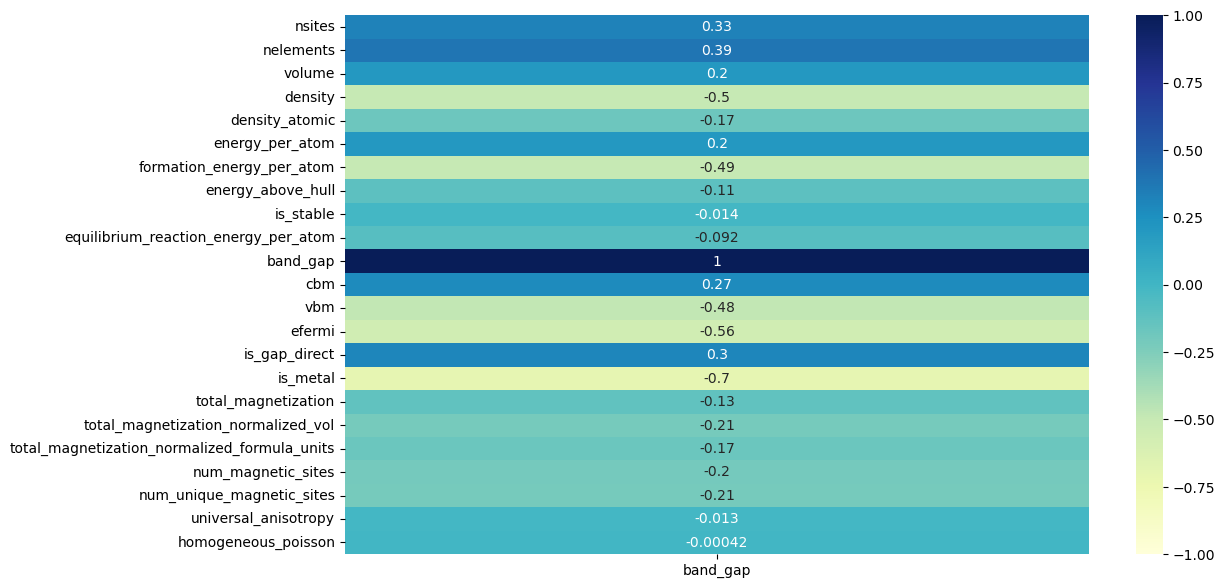

In [233]:
df = df.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)

numerical_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(12, 7))
corr_matrix = numerical_df.corr()

corr_band_gap = corr_matrix[['band_gap']]
sns.heatmap(corr_band_gap, annot=True, cmap="YlGnBu", vmin=-1, vmax=1)

plt.show()

In [234]:
categorical_df=df.select_dtypes(include=['object'])
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49772 entries, 0 to 49771
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   formula_pretty             49771 non-null  object
 1   elements                   49772 non-null  object
 2   composition                49772 non-null  object
 3   composition_reduced        49772 non-null  object
 4   formula_anonymous          49772 non-null  object
 5   chemsys                    49772 non-null  object
 6   symmetry                   49772 non-null  object
 7   property_name              49772 non-null  object
 8   material_id                49772 non-null  object
 9   structure                  49772 non-null  object
 10  decomposes_to              25618 non-null  object
 11  xas                        37228 non-null  object
 12  bandstructure              35306 non-null  object
 13  dos                        39784 non-null  object
 14  is_mag

In [235]:
pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 25)
pd.set_option('display.max_colwidth', 25)
pd.set_option('display.width', 25)

In [236]:
categorical_df.head()

,formula_pretty,elements,composition,composition_reduced,formula_anonymous,chemsys,symmetry,property_name,material_id,structure,decomposes_to,xas,bandstructure,dos,is_magnetic,ordering,types_of_magnetic_species,bulk_modulus,shear_modulus,possible_species,has_props
0,O2,['O'],{'O': 1.0},{'O': 2.0},A,O,{'crystal_system': 'M...,summary,mp-1056831,c,[{'material_id': 'mp-...,NaN,NaN,NaN,False,NM,[],NaN,NaN,[],"{'materials': True, '..."
1,W,['W'],{'W': 25.0},{'W': 1.0},A,W,{'crystal_system': 'M...,summary,mp-1191581,{'@module': 'pymatgen...,[{'material_id': 'mp-...,"[{'edge': 'L3', 'abso...",NaN,NaN,False,NM,[],NaN,NaN,[],"{'materials': True, '..."
2,Cu,['Cu'],{'Cu': 1.0},{'Cu': 1.0},A,Cu,{'crystal_system': 'M...,summary,mp-1056079,{'@module': 'pymatgen...,[{'material_id': 'mp-...,"[{'edge': 'L3', 'abso...",NaN,NaN,True,FM,['Cu'],NaN,NaN,[],"{'materials': True, '..."
3,W,['W'],{'W': 20.0},{'W': 1.0},A,W,{'crystal_system': 'M...,summary,mp-1178801,{'@module': 'pymatgen...,[{'material_id': 'mp-...,"[{'edge': 'L2', 'abso...",{'setyawan_curtarolo'...,{'total': {'1': {'tas...,False,NM,[],NaN,NaN,[],"{'materials': True, '..."
4,Ta,['Ta'],{'Ta': 30.0},{'Ta': 1.0},A,Ta,{'crystal_system': 'T...,summary,mp-42,{'@module': 'pymatgen...,[{'material_id': 'mp-...,"[{'edge': 'K', 'absor...",{'setyawan_curtarolo'...,{'total': {'1': {'tas...,False,NM,[],"{'voigt': 195.607, 'r...","{'voigt': 61.792, 're...",[],"{'materials': True, '..."


In [237]:
categorical_df.drop(['elements','composition','composition_reduced','formula_anonymous',
                     'chemsys','property_name','types_of_magnetic_species','possible_species',
                     'types_of_magnetic_species','material_id'
                     ], inplace=True, axis=1)

categorical_df.head()

,formula_pretty,symmetry,structure,decomposes_to,xas,bandstructure,dos,is_magnetic,ordering,bulk_modulus,shear_modulus,has_props
0,O2,{'crystal_system': 'M...,c,[{'material_id': 'mp-...,NaN,NaN,NaN,False,NM,NaN,NaN,"{'materials': True, '..."
1,W,{'crystal_system': 'M...,{'@module': 'pymatgen...,[{'material_id': 'mp-...,"[{'edge': 'L3', 'abso...",NaN,NaN,False,NM,NaN,NaN,"{'materials': True, '..."
2,Cu,{'crystal_system': 'M...,{'@module': 'pymatgen...,[{'material_id': 'mp-...,"[{'edge': 'L3', 'abso...",NaN,NaN,True,FM,NaN,NaN,"{'materials': True, '..."
3,W,{'crystal_system': 'M...,{'@module': 'pymatgen...,[{'material_id': 'mp-...,"[{'edge': 'L2', 'abso...",{'setyawan_curtarolo'...,{'total': {'1': {'tas...,False,NM,NaN,NaN,"{'materials': True, '..."
4,Ta,{'crystal_system': 'T...,{'@module': 'pymatgen...,[{'material_id': 'mp-...,"[{'edge': 'K', 'absor...",{'setyawan_curtarolo'...,{'total': {'1': {'tas...,False,NM,"{'voigt': 195.607, 'r...","{'voigt': 61.792, 're...","{'materials': True, '..."


In [238]:
#get null count for magnetic

print(categorical_df['is_magnetic'].isna().sum())



192


In [239]:
#fill nan with 0 (false) values
categorical_df['is_magnetic'] = categorical_df['is_magnetic'].fillna(False)

categorical_df['is_magnetic'] = categorical_df['is_magnetic'].astype(int)

numerical_df.add(categorical_df['is_magnetic'], axis=0)
categorical_df.drop(['is_magnetic'], axis=1, inplace=True)

categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49772 entries, 0 to 49771
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   formula_pretty  49771 non-null  object
 1   symmetry        49772 non-null  object
 2   structure       49772 non-null  object
 3   decomposes_to   25618 non-null  object
 4   xas             37228 non-null  object
 5   bandstructure   35306 non-null  object
 6   dos             39784 non-null  object
 7   ordering        49580 non-null  object
 8   bulk_modulus    7429 non-null   object
 9   shear_modulus   7429 non-null   object
 10  has_props       49772 non-null  object
dtypes: object(11)
memory usage: 4.2+ MB


/var/folders/xk/fhgbj8qj60n54b05mpfnck0w0000gn/T/ipykernel_67424/2365508944.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  categorical_df['is_magnetic'] = categorical_df['is_magnetic'].fillna(False)


In [240]:
# pd.set_option('display.max_columns', 25)
pd.set_option('display.max_rows', 5)
pd.set_option('display.max_colwidth', 500)
# pd.set_option('display.width', 25)

print(categorical_df['has_props'])

pd.set_option('display.max_rows', 25)
pd.set_option('display.max_colwidth', 25)


0        {'materials': True, 'thermo': True, 'xas': False, 'grain_boundaries': False, 'chemenv': True, 'electronic_structure': True, 'absorption': False, 'bandstructure': False, 'dos': False, 'magnetism': True, 'elasticity': False, 'dielectric': False, 'piezoelectric': False, 'surface_properties': False, 'oxi_states': True, 'provenance': True, 'charge_density': True, 'eos': False, 'phonon': False, 'insertion_electrodes': False, 'substrates': False}
1         {'materials': True, 'thermo': True, 'xas': True, 'grain_boundaries': False, 'chemenv': True, 'electronic_structure': True, 'absorption': False, 'bandstructure': False, 'dos': False, 'magnetism': True, 'elasticity': False, 'dielectric': False, 'piezoelectric': False, 'surface_properties': False, 'oxi_states': True, 'provenance': True, 'charge_density': True, 'eos': False, 'phonon': False, 'insertion_electrodes': False, 'substrates': False}
                                                                                              

In [241]:
categorical_df['has_props'] = categorical_df['has_props'].apply(eval)  
# Use eval to convert strings to dictionaries

# Expand the 'has_props' column into individual columns
has_props_bools = pd.json_normalize(categorical_df['has_props'])

numerical_df = pd.concat([numerical_df, has_props_bools], axis=1)
categorical_df = categorical_df.drop(columns=['has_props'])
numerical_df[numerical_df.select_dtypes(include=['bool']).columns] = numerical_df.select_dtypes(include=['bool']).astype(int)

numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49772 entries, 0 to 49771
Data columns (total 44 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   nsites                                        49772 non-null  int64  
 1   nelements                                     49772 non-null  int64  
 2   volume                                        49772 non-null  float64
 3   density                                       49772 non-null  float64
 4   density_atomic                                49772 non-null  float64
 5   energy_per_atom                               48674 non-null  float64
 6   formation_energy_per_atom                     48674 non-null  float64
 7   energy_above_hull                             48674 non-null  float64
 8   is_stable                                     49772 non-null  int64  
 9   equilibrium_reaction_energy_per_atom          23056 non-null 

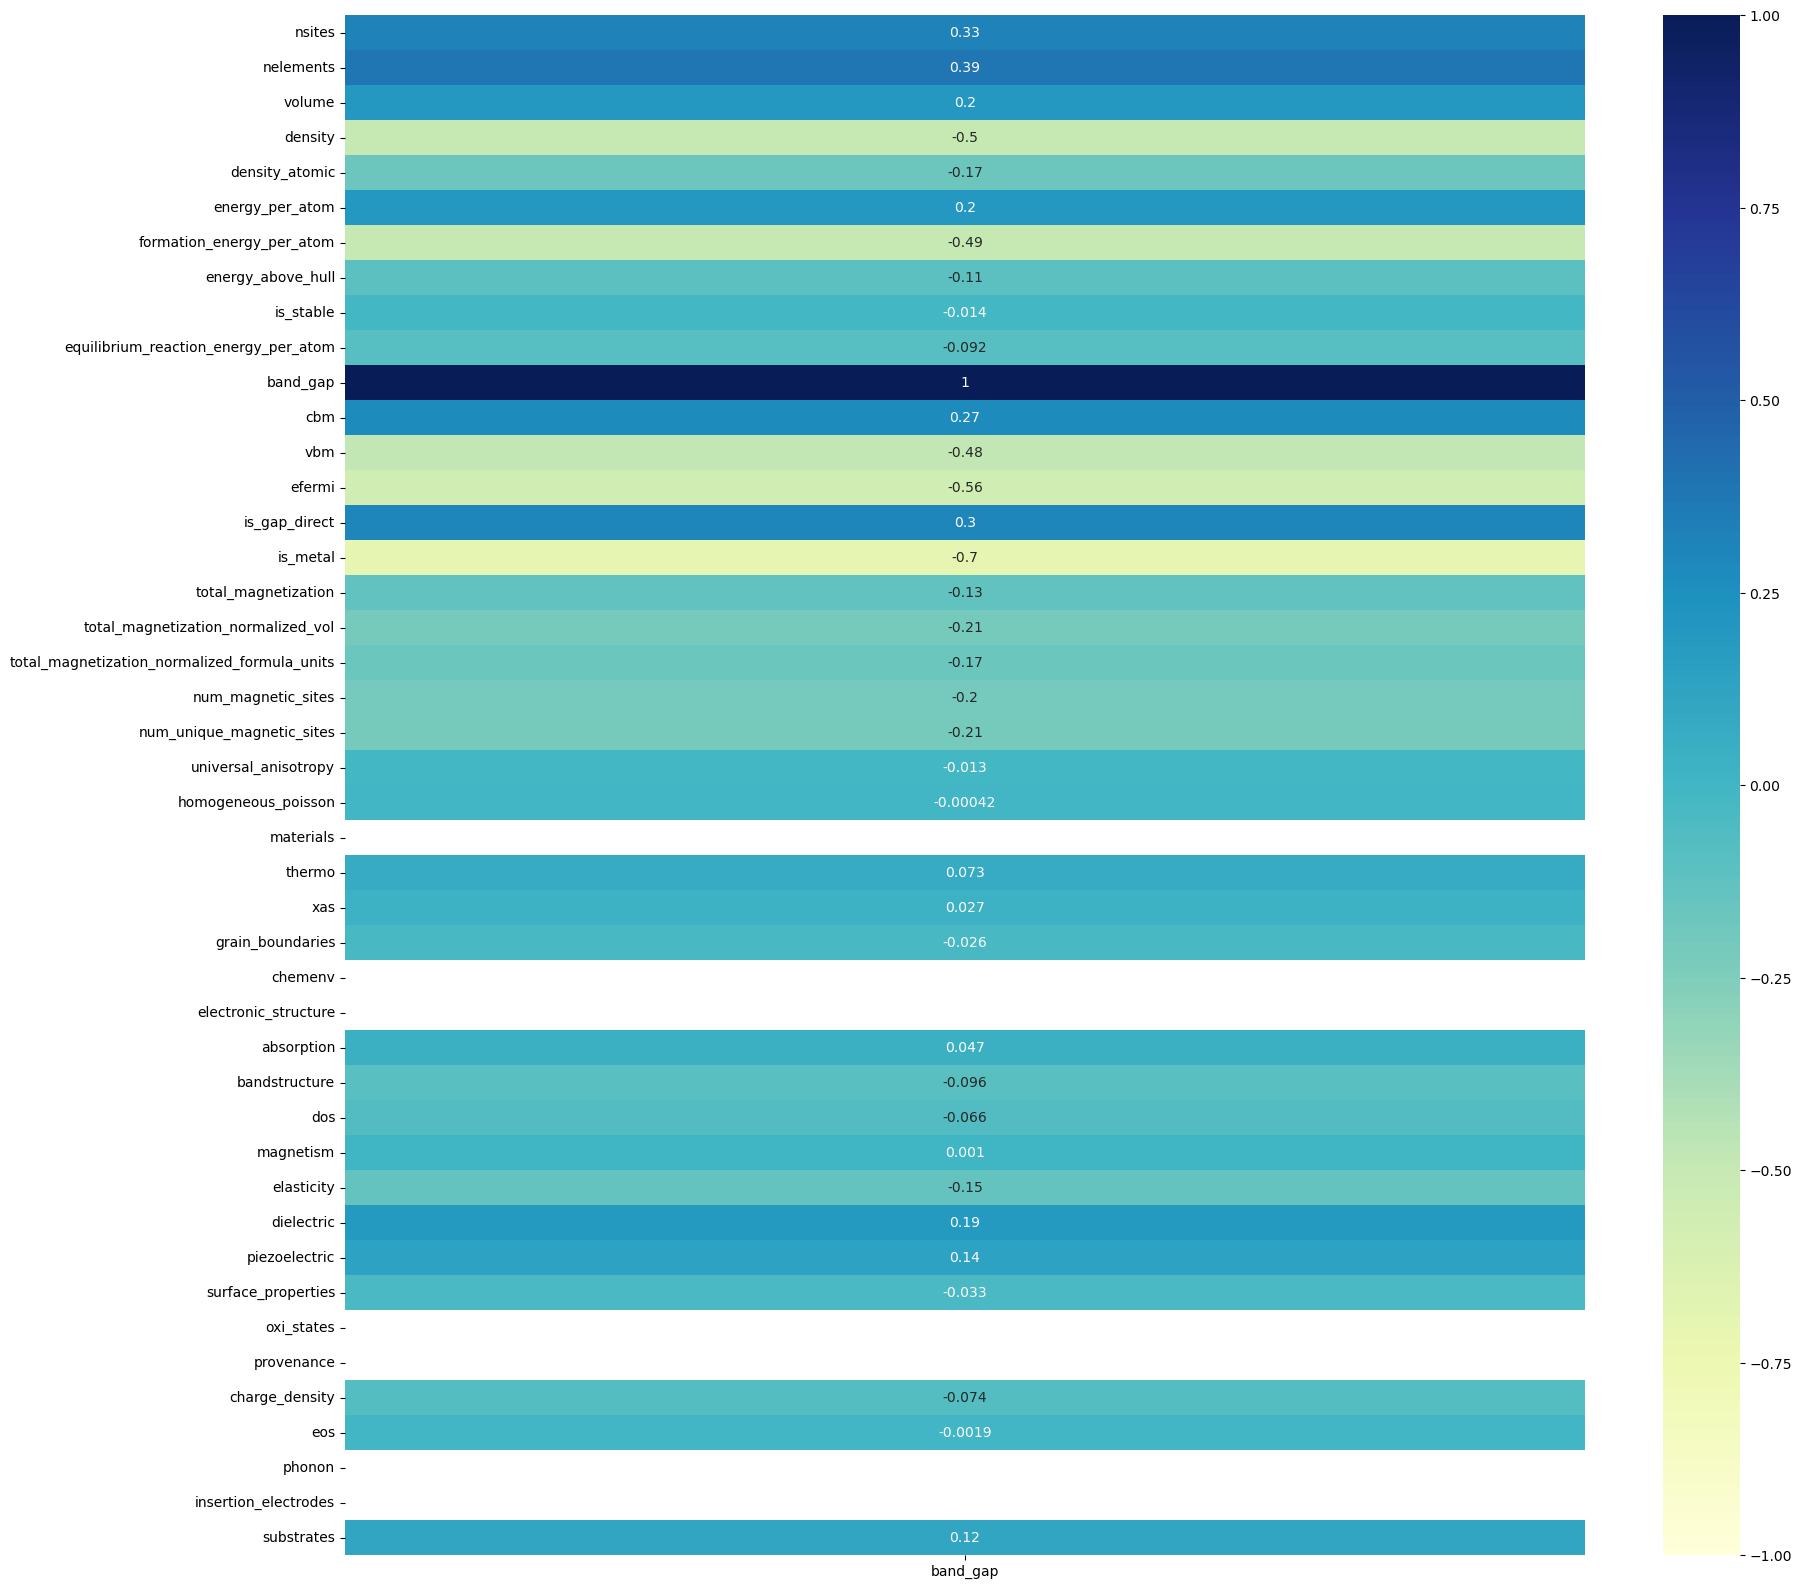

In [242]:
plt.figure(figsize=(20, 20))
corr_matrix = numerical_df.corr()

corr_band_gap = corr_matrix[['band_gap']]
sns.heatmap(corr_band_gap, annot=True, cmap="YlGnBu", vmin=-1, vmax=1)

plt.show()

In [243]:
print((numerical_df['chemenv'] == 0).sum(), (numerical_df['chemenv'] == 1).sum())
print((numerical_df['materials'] == 0).sum(), (numerical_df['materials'] == 1).sum())
print((numerical_df['electronic_structure'] == 0).sum(),  (numerical_df['electronic_structure'] == 1).sum())
print((numerical_df['oxi_states'] == 0).sum(),  (numerical_df['oxi_states'] == 1).sum())
print((numerical_df['provenance'] == 0).sum(),  (numerical_df['provenance'] == 1).sum())
print((numerical_df['phonon'] == 0).sum(),  (numerical_df['phonon'] == 1).sum())
print((numerical_df['insertion_electrodes'] == 0).sum(),  (numerical_df['insertion_electrodes'] == 1).sum())

0 49772
0 49772
0 49772
0 49772
0 49772
49772 0
49772 0


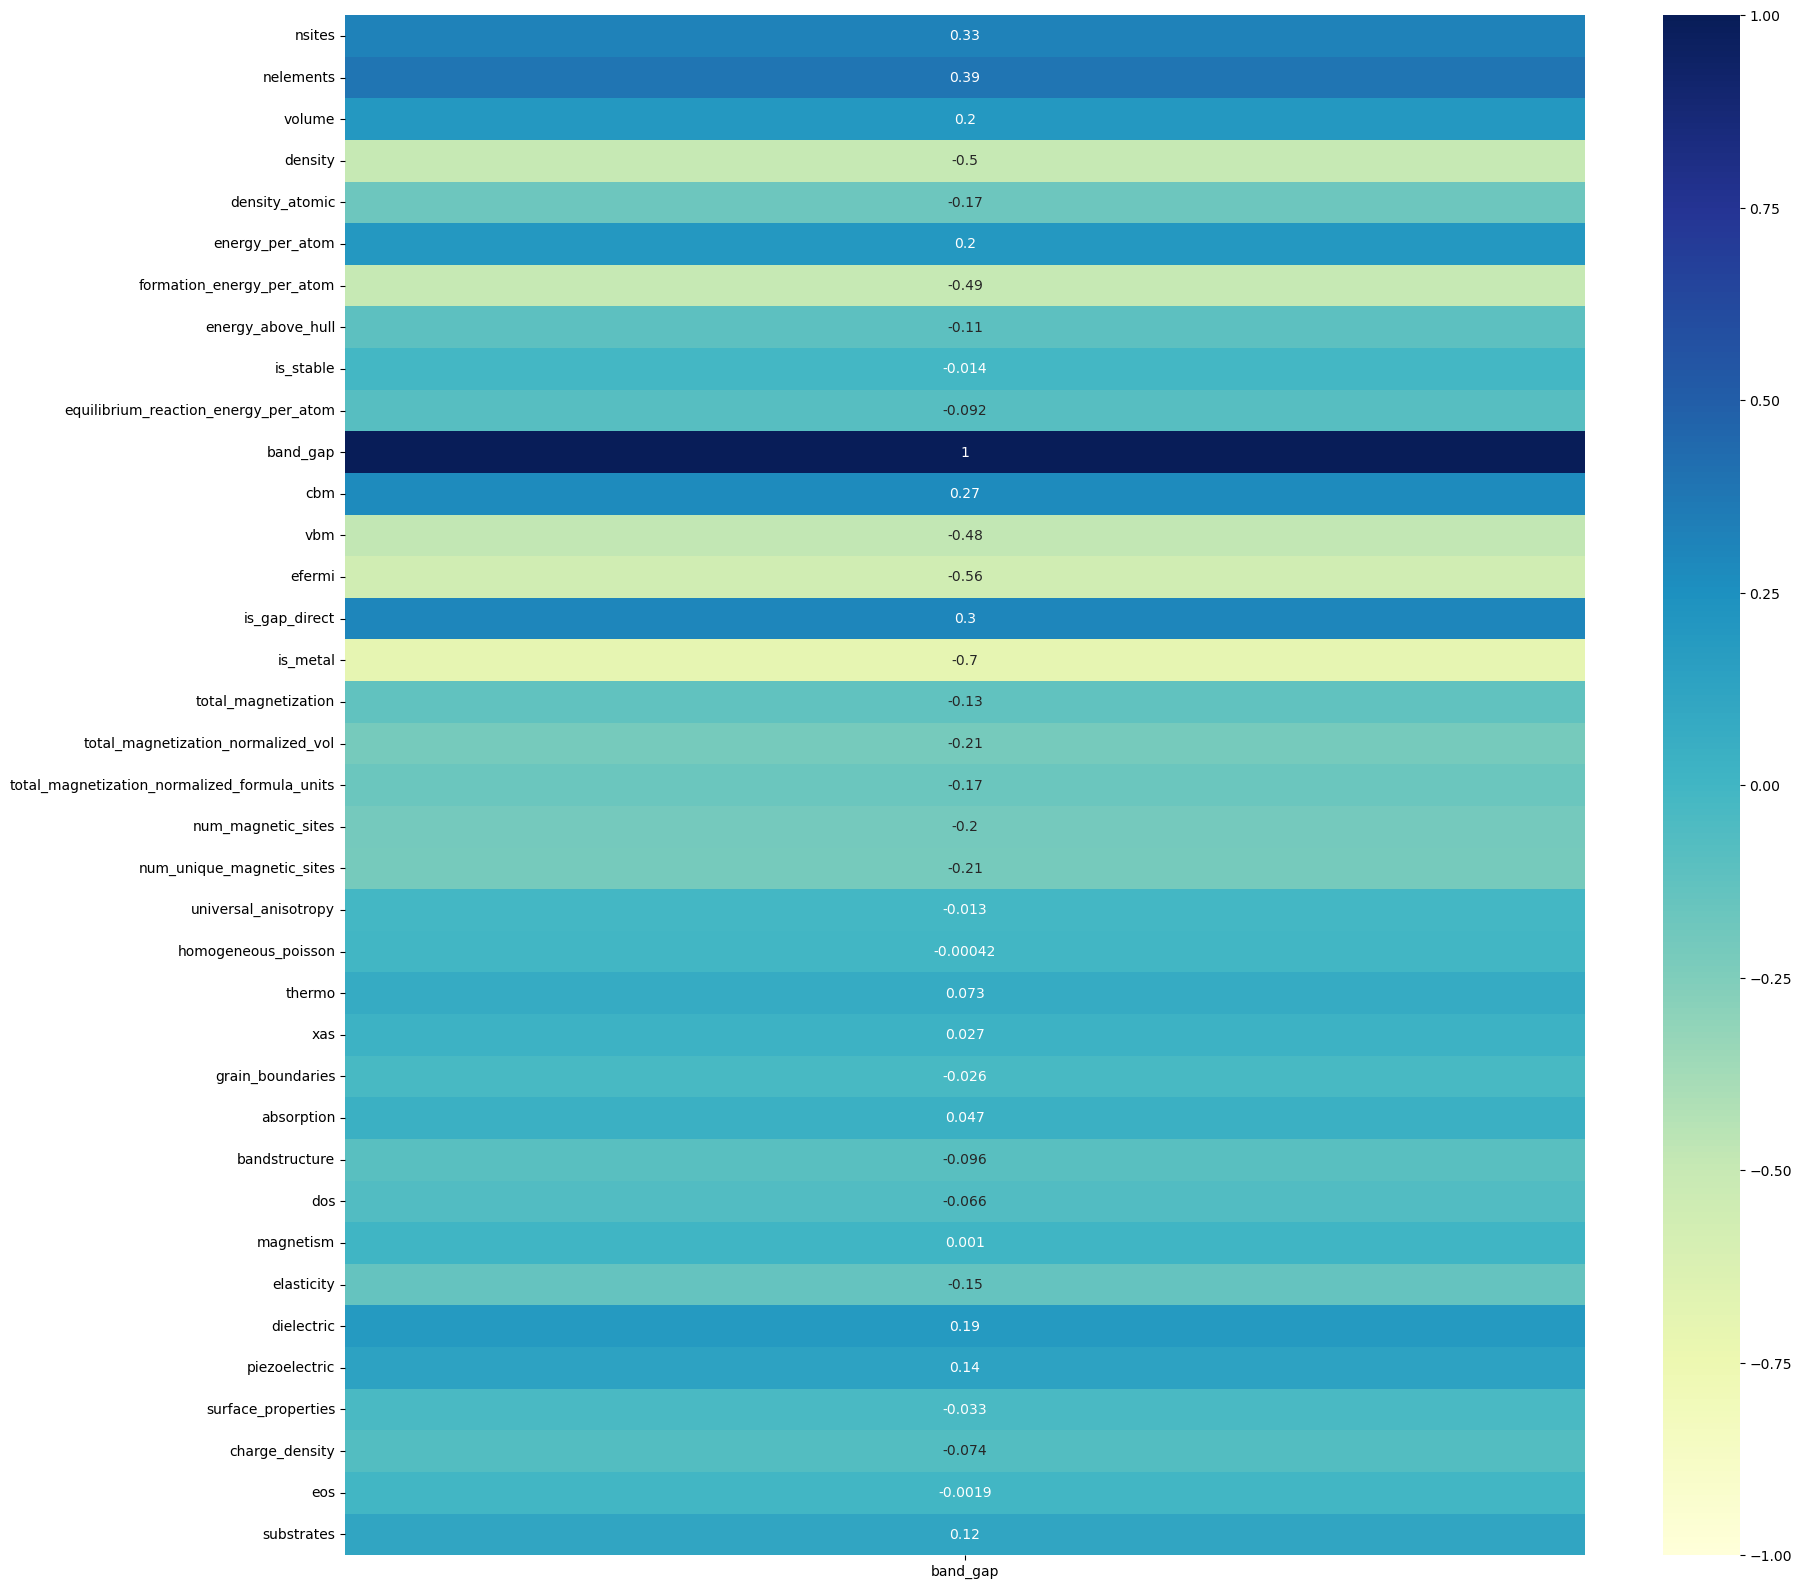

In [244]:
#These values provide no insight - either all 1 or 0 - drop them all
numerical_df.drop(['chemenv', 'materials', 'electronic_structure', 'oxi_states', 'provenance', 'phonon', 'insertion_electrodes'], inplace=True, axis=1)

plt.figure(figsize=(20, 20))
corr_matrix = numerical_df.corr()

corr_band_gap = corr_matrix[['band_gap']]
sns.heatmap(corr_band_gap, annot=True, cmap="YlGnBu", vmin=-1, vmax=1)

plt.show()

In [245]:
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49772 entries, 0 to 49771
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   formula_pretty  49771 non-null  object
 1   symmetry        49772 non-null  object
 2   structure       49772 non-null  object
 3   decomposes_to   25618 non-null  object
 4   xas             37228 non-null  object
 5   bandstructure   35306 non-null  object
 6   dos             39784 non-null  object
 7   ordering        49580 non-null  object
 8   bulk_modulus    7429 non-null   object
 9   shear_modulus   7429 non-null   object
dtypes: object(10)
memory usage: 3.8+ MB


In [246]:
# print(categorical_df[categorical_df['shear_modulus'].notna()])

# categorical_df['shear_modulus'] = categorical_df['shear_modulus'].apply(eval)  
# Use eval to convert strings to dictionaries

# Expand the 'shear_modulus' column into individual columns
# shear_modulus_bools = pd.json_normalize(categorical_df['shear_modulus'])

# shear_modulus_bools.head()

# numerical_df = pd.concat([numerical_df, has_props_bools], axis=1)

# categorical_df = categorical_df.drop(columns=['shear_modulus'])
# numerical_df[numerical_df.select_dtypes(include=['bool']).columns] = numerical_df.select_dtypes(include=['bool']).astype(int)


categorical_df.drop(['shear_modulus'], inplace= True, axis=1)
categorical_df.head()

,formula_pretty,symmetry,structure,decomposes_to,xas,bandstructure,dos,ordering,bulk_modulus
0,O2,{'crystal_system': 'M...,c,[{'material_id': 'mp-...,NaN,NaN,NaN,NM,NaN
1,W,{'crystal_system': 'M...,{'@module': 'pymatgen...,[{'material_id': 'mp-...,"[{'edge': 'L3', 'abso...",NaN,NaN,NM,NaN
2,Cu,{'crystal_system': 'M...,{'@module': 'pymatgen...,[{'material_id': 'mp-...,"[{'edge': 'L3', 'abso...",NaN,NaN,FM,NaN
3,W,{'crystal_system': 'M...,{'@module': 'pymatgen...,[{'material_id': 'mp-...,"[{'edge': 'L2', 'abso...",{'setyawan_curtarolo'...,{'total': {'1': {'tas...,NM,NaN
4,Ta,{'crystal_system': 'T...,{'@module': 'pymatgen...,[{'material_id': 'mp-...,"[{'edge': 'K', 'absor...",{'setyawan_curtarolo'...,{'total': {'1': {'tas...,NM,"{'voigt': 195.607, 'r..."


In [247]:
# import ast


# def safe_literal_eval(x):
#     try:
#         return ast.literal_eval(x)
#     except (ValueError, SyntaxError):
#         return None  # or some other default value
    


# categorical_df['structure'] = categorical_df['structure'].apply(safe_literal_eval)

# # categorical_df['structure'] = categorical_df['structure'].str.replace("'", ' "')
# categorical_df['structure'] = categorical_df['structure'].apply(ast.literal_eval)

# categorical_df['structure'].head()

# # lattice_df = categorical_df['structure'].apply(lambda x: x['lattice'])

# # lattice_df=categorical_df['structure']['lattice']

In [248]:
df.to_csv('../ignore/5_low_frequencies_removed.csv', index=False)
numerical_df.to_csv('../dataset/5_numerical_data.csv', index=False)
categorical_df.to_csv('../dataset/5_categorical_data.csv', index=False)
